# BÀI TẬP THỰC HÀNH LẬP TRÌNH PHÂN TÍCH DỮ LIỆU 1

### BÀI TOÁN PHÂN LỚP: CLASSIFICATION & CLUSTERING

## Bài 2

In [1]:
'''
Dựa vào điểm thi xét tuyển trường IUH cần tuyển những học sinh có điểm thi ưu tiên
NGONNGU tốt và LOGIC vừa phải để phù hợp với nhu cầu đào tạo. Hãy đưa ra đề xuất các nhóm học sinh có kết
quả phù hợp và căn cứ vào chỉ tiêu (số lượng sinh viên)
Vấn đề đặt ra: Thế nào là tốt? Thế nào là kha khá? -- theo dữ liệu tuyển sinh này
--> Tiêu chuẩn chọn lựa mập mờ => Giải pháp
'''

'\nDựa vào điểm thi xét tuyển trường IUH cần tuyển những học sinh có điểm thi ưu tiên\nNGONNGU tốt và LOGIC vừa phải để phù hợp với nhu cầu đào tạo. Hãy đưa ra đề xuất các nhóm học sinh có kết\nquả phù hợp và căn cứ vào chỉ tiêu (số lượng sinh viên)\nVấn đề đặt ra: Thế nào là tốt? Thế nào là kha khá? -- theo dữ liệu tuyển sinh này\n--> Tiêu chuẩn chọn lựa mập mờ => Giải pháp\n'

In [2]:
# Giải thuật gom cụm (Clustering)

'''
Đây là giải thuật có input đầu vào nhưng không có sẵn output đầu ra trong tập dữ liệu lịch
sử
Do đó ta gọi là nhóm kỹ thuật un-supervised (học không giám sát)
Để giải quyết nhóm kỹ thuật này ta cần các yếu tố như sau
1. Dữ liệu đầu vào
2. Phải có metric (độ đo) để xác định các phần tử sẽ thuộc về đâu
3. Cần cung cấp trước số lượng cụm (k) được tạo ra

Hệ quả:
1. Các phần tử thuộc về cùng 1 cụm thì có mức độ gần gũi (theo độ đo đặt ra) hơn so với
phần tử ở cụm khác
2. Mỗi cụm sẽ có một đại diện được gọi là trung tâm

-> Trong các giải thuật về dạng toán này người ta thường dùng độ đo Euclide để đo lường
mức độ gần nhau của các phần tử

--> Giải thuật điển hình là giải thuật K-Means
'''

'\nĐây là giải thuật có input đầu vào nhưng không có sẵn output đầu ra trong tập dữ liệu lịch\nsử\nDo đó ta gọi là nhóm kỹ thuật un-supervised (học không giám sát)\nĐể giải quyết nhóm kỹ thuật này ta cần các yếu tố như sau\n1. Dữ liệu đầu vào\n2. Phải có metric (độ đo) để xác định các phần tử sẽ thuộc về đâu\n3. Cần cung cấp trước số lượng cụm (k) được tạo ra\n\nHệ quả:\n1. Các phần tử thuộc về cùng 1 cụm thì có mức độ gần gũi (theo độ đo đặt ra) hơn so với\nphần tử ở cụm khác\n2. Mỗi cụm sẽ có một đại diện được gọi là trung tâm\n\n-> Trong các giải thuật về dạng toán này người ta thường dùng độ đo Euclide để đo lường\nmức độ gần nhau của các phần tử\n\n--> Giải thuật điển hình là giải thuật K-Means\n'

Import thư viện

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans

Đọc dữ liệu từ file csv

In [5]:
df = pd.read_csv('../data/dulieuxettuyendaihoc.csv', header=0, delimiter=',', encoding='utf-8')

Đổi tên cột

In [6]:
df = df[['NGONNGU', 'TOANLOGICPHANTICH', 'GIAIQUYETVANDE', 'DINHHUONGNGHENGHIEP']]
df.rename(columns=
    {
    'TOANLOGICPHANTICH': 'LOGIC',
    'GIAIQUYETVANDE': 'UNGXU',
    'DINHHUONGNGHENGHIEP': 'DINHHUONG'
    }, inplace=True)
df.head(5)

,NGONNGU,LOGIC,UNGXU,DINHHUONG
0,3.25,3.25,4.50,No
1,6.00,4.00,3.50,Yes
2,5.00,6.75,4.00,No
3,4.25,4.25,5.25,No
4,4.25,4.50,5.00,No


In [7]:
data = df[['NGONNGU', 'LOGIC']]

In [8]:
data.head(5)

,NGONNGU,LOGIC
0,3.25,3.25
1,6.00,4.00
2,5.00,6.75
3,4.25,4.25
4,4.25,4.50


In [9]:
# Độ đo Euclide
d = np.sqrt((3.25-6.0)**2 + (3.25-4.0)**2)
d

2.850438562747845

In [10]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data)

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Lan Anh\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Pop

In [11]:
# Số tâm
print(kmeans.cluster_centers_)

# Độ đo đánh giá
print(kmeans.inertia_)

# Sẽ lặp bao nhiêu lần để tìm giá trị điển hình
print(kmeans.n_iter_)

# Nhãn của các điểm dữ liệu
print(kmeans.labels_[:])

'''
100 sinh viên được chia tối đa là 100 cụm
Tâm là 1 đại lượng được tính toán bằng thuật toán
'''

[[4.97       3.25      ]
 [2.16666667 4.28787879]
 [3.75       4.48484848]
 [6.05555556 6.08333333]]
87.22813131313131
10
[2 0 3 2 2 1 3 2 2 2 1 3 1 1 2 0 2 2 2 2 1 0 0 3 0 0 0 3 2 1 0 2 2 1 1 1 0
 1 1 1 0 2 0 1 2 1 0 3 0 2 1 1 2 1 0 2 3 1 1 1 1 2 0 1 0 1 2 2 2 1 1 2 1 1
 0 0 2 2 2 1 0 1 2 1 3 2 1 1 2 1 0 2 2 2 0 0 0 3 0 0]


'\n100 sinh viên được chia tối đa là 100 cụm\nTâm là 1 đại lượng được tính toán bằng thuật toán\n'

In [12]:
def euclid (a1, a2, b1, b2):
    d = np.sqrt((a1-b1)**2 + (a2-b2)**2)
    return d
euclid(3.25, 3.25, 2.11, 4.31)

1.5566630977832037

In [13]:
# metrics: thuật toán

kmeans1 = KMeans(n_clusters=6).fit(data)

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [14]:
# Số tâm
print(kmeans.cluster_centers_)

# Độ đo đánh giá
print(kmeans.inertia_)

# Sẽ lặp bao nhiêu lần để tìm giá trị điển hình tối ưu
print(kmeans.n_iter_)

# Nhãn của các điểm dữ liệu
print(kmeans.labels_[:])


[[4.97       3.25      ]
 [2.16666667 4.28787879]
 [3.75       4.48484848]
 [6.05555556 6.08333333]]
87.22813131313131
10
[2 0 3 2 2 1 3 2 2 2 1 3 1 1 2 0 2 2 2 2 1 0 0 3 0 0 0 3 2 1 0 2 2 1 1 1 0
 1 1 1 0 2 0 1 2 1 0 3 0 2 1 1 2 1 0 2 3 1 1 1 1 2 0 1 0 1 2 2 2 1 1 2 1 1
 0 0 2 2 2 1 0 1 2 1 3 2 1 1 2 1 0 2 2 2 0 0 0 3 0 0]


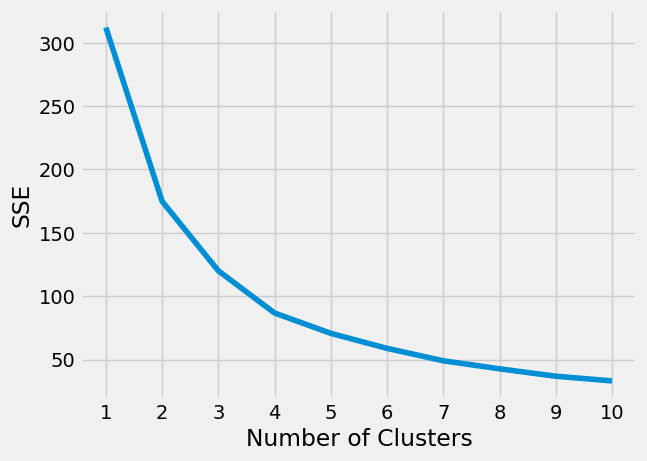

In [15]:
# Cách 1: Dùng Elbow Method
# Chọn số cụm tốt nhất
# url: https://realpython.com/k-means-clustering-python/
# url: https://dataofish.com/k-means-clustering-python/

kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [17]:
# Cách 2: Dùng phương pháp độ đo Elbow để tìm số cụm là tốt nhát

from kneed import KneeLocator
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print(kl.elbow)

4


In [20]:
# Xây dựng ứng dụng hiển thị danh sách sinh viên và nhãn (label)
# Cụm sinh viên thuộc vào

kmeans = KMeans(n_clusters=4).fit(data)
data['Cluster'] = kmeans.labels_[:]
print(data[['NGONNGU', 'LOGIC', 'Cluster']])


    NGONNGU  LOGIC  Cluster
0      3.25   3.25        2
1      6.00   4.00        1
2      5.00   6.75        3
3      4.25   4.25        2
4      4.25   4.50        2
..      ...    ...      ...
95     5.25   1.50        1
96     5.25   3.75        1
97     7.00   8.00        3
98     5.00   3.50        1
99     5.25   2.50        1

[100 rows x 3 columns]


e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


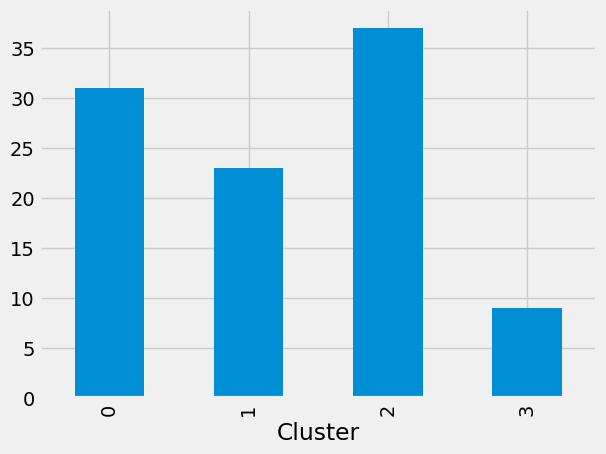

In [21]:
gr_data = data.groupby('Cluster').size()
gr_data.plot.bar()
plt.show()

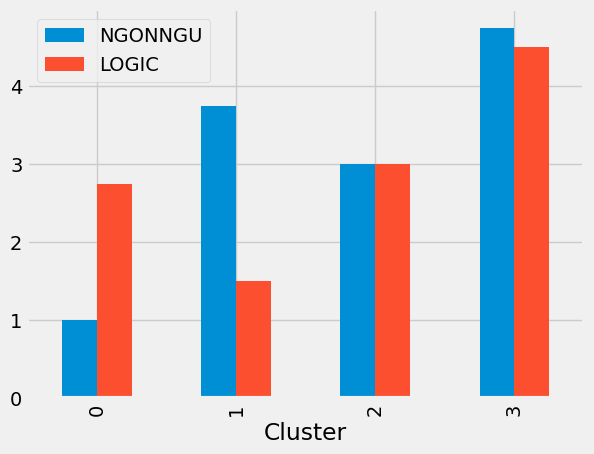

In [22]:
gr_data_min = data.groupby(['Cluster'])[['NGONNGU', 'LOGIC']].min()
gr_data_min.plot.bar()
plt.show()

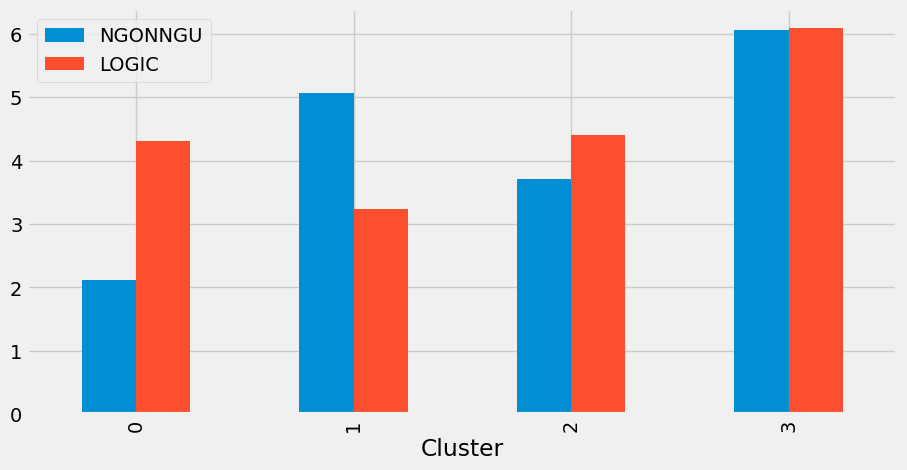

In [23]:
gr_data_min = data.groupby(['Cluster'])[['NGONNGU', 'LOGIC']].mean()
gr_data_min.plot(kind='bar', figsize=(10, 5))
plt.show()

In [ ]:
# Sinh viên khám phá các cụm cho tập điểm số (NGONNGU, LOGIC, UNGXU)